In [1]:
# EE532L - Deep Learning for Healthcare - Programming Assignment 04
# Authors: Jibitesh Saha, Sasidhar Alavala, Subrahmanyam Gorthi
# Important: Please do not change/rename the existing function names and write your code only in the place where you are asked to do it.


########################################################## Can be modified ##############################################################
# You can import libraries as per your need
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [2]:
X_train = np.load('data/train_images.npy')

X_val = np.load('data/val_images.npy')
   
X_test = np.load('data/test_images.npy')

y_train = np.squeeze(np.load('data/train_labels.npy'))
   
y_val = np.squeeze(np.load('data/val_labels.npy'))
   
y_test = np.squeeze(np.load('data/test_labels.npy'))

X_train = X_train / 255.0 


X_val = X_val / 255.0 

X_test = X_test / 255.0 
X_train = np.expand_dims(X_train,axis = 3)
X_val = np.expand_dims(X_val,axis = 3)
X_test = np.expand_dims(X_test,axis = 3)


Epoch 1/30
74/74 [==============================] - 4s 37ms/step - loss: 0.7687 - accuracy: 0.7215 - val_loss: 0.5288 - val_accuracy: 0.7424
Epoch 2/30
74/74 [==============================] - 2s 34ms/step - loss: 0.3497 - accuracy: 0.8322 - val_loss: 0.2371 - val_accuracy: 0.8969
Epoch 3/30
74/74 [==============================] - 3s 34ms/step - loss: 0.2126 - accuracy: 0.9125 - val_loss: 0.1873 - val_accuracy: 0.9237
Epoch 4/30
74/74 [==============================] - 2s 33ms/step - loss: 0.1835 - accuracy: 0.9282 - val_loss: 0.1657 - val_accuracy: 0.9351
Epoch 5/30
74/74 [==============================] - 2s 33ms/step - loss: 0.1642 - accuracy: 0.9344 - val_loss: 0.1611 - val_accuracy: 0.9275
Epoch 6/30
74/74 [==============================] - 2s 31ms/step - loss: 0.1467 - accuracy: 0.9403 - val_loss: 0.1222 - val_accuracy: 0.9580
Epoch 7/30
74/74 [==============================] - 2s 32ms/step - loss: 0.1387 - accuracy: 0.9482 - val_loss: 0.1176 - val_accuracy: 0.9580
Epoch 8/30
74

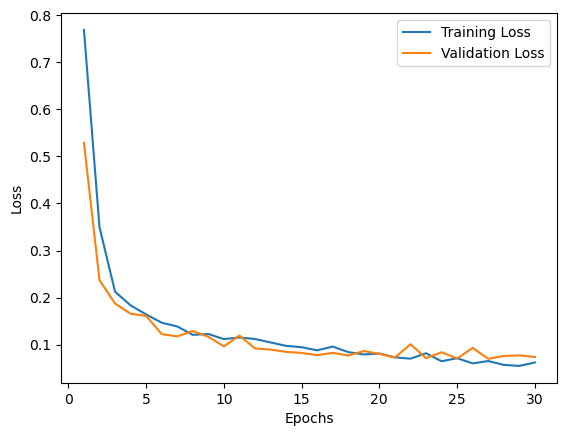

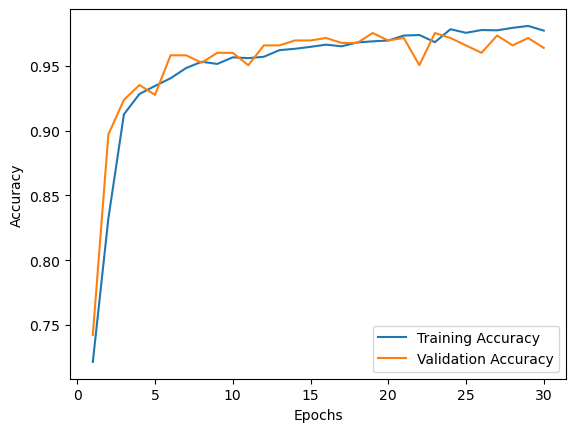

20/20 [==============================] - 0s 5ms/step
Test Loss: 0.5223093032836914
Test Accuracy: 0.8653846383094788
Test Precision: 0.9015048622806541
Test Recall: 0.8239316239316239
Test F1 Score: 0.8437917222963951
Confusion Matrix:
[[154  80]
 [  4 386]]


In [3]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 30
H = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)

plt.plot(range(1, epochs + 1), H.history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), H.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(range(1, epochs + 1), H.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), H.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_test_pred = np.argmax(model.predict(X_test), axis=1)

test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
cm = confusion_matrix(y_test, y_test_pred)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Confusion Matrix:")
print(cm)
